## dataset for metro station

eminities

In [60]:

import pandas as pd

df = pd.read_csv('/content/updated_data.csv')

In [61]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Amenity Type,Name,Latitude,Longitude,road,suburb,state_district,road_count,suburb_count,district_count,scaled_suburb,population
0,bar,mohini bar,28.633277,77.223876,Connaught Lane,Chanakya Puri Tehsil,NaN,10,199,0,7.158273,10007
1,bar,The Gem Bar,28.641502,77.216079,Main Bazar Road,Paharganj,Central Delhi,24,38,318,1.366906,24319
2,bar,OMG Bar & Kitchen,28.631405,77.220446,Rajiv Chowk,Connaught Place,NaN,41,278,0,10.000000,41010
3,bar,My Love,28.638413,77.210406,Panchkuian Road,Karol Bagh Tehsil,Central Delhi,16,82,318,2.949640,16320
4,bar,Sam's bar,28.641130,77.212683,Arya Nagar Road;Sang Trashan Marg,Karol Bagh Tehsil,Central Delhi,5,82,318,2.949640,5320
...,...,...,...,...,...,...,...,...,...,...,...,...
1274,place_of_worship,Dargah Hazrat Baba Rangeele Shah Chisthi Nizami,28.625921,77.211224,Bangla Sahib Lane,Connaught Place,NaN,1,278,0,10.000000,1010
1275,place_of_worship,Sindhi Sat Sangat Darbar,28.568385,77.247512,Shiv Mandir Marg,Lajpat Nagar,South East Delhi,21,120,255,4.316547,21259
1276,public_bath,Deluxe Bath,28.642282,77.223417,Bhavbhuti Marg,NaN,Central Delhi,6,0,318,0.000000,6318
1277,public_bath,Deluxe Bath,28.642434,77.222874,Bhavbhuti Marg,NaN,Central Delhi,6,0,318,0.000000,6318


In [62]:
import pandas as pd


unique_values = df['Amenity Type'].unique()

# Print the unique values
print("Unique values in 'ColumnA' are:")
for value in unique_values:
    print(value)

Unique values in 'ColumnA' are:
bar
cafe
fast_food
food_court
ice_cream
pub
restaurant
college
kindergarten
language_school
library
training
music_school
school
bicycle_parking
fuel
parking
taxi
atm
bank
money_transfer
clinic
dentist
doctors
hospital
nursing_home
pharmacy
veterinary
arts_centre
cinema
community_centre
conference_centre
fountain
nightclub
studio
theatre
courthouse
fire_station
police
post_box
post_office
drinking_water
shelter
telephone
toilets
crematorium
grave_yard
internet_cafe
marketplace
place_of_worship
public_bath
public_building


In [63]:
# prompt: just keep feature aminity type and Latitude	Longitude

import pandas as pd

# Assuming the uploaded file is named 'data.csv'
df = pd.read_csv('/content/updated_data.csv')

# Select only the desired columns
df_filtered = df[['Amenity Type', 'Latitude', 'Longitude']]

# Print the filtered DataFrame
df_filtered

,Amenity Type,Latitude,Longitude
0,bar,28.633277,77.223876
1,bar,28.641502,77.216079
2,bar,28.631405,77.220446
3,bar,28.638413,77.210406
4,bar,28.641130,77.212683
...,...,...,...
1274,place_of_worship,28.625921,77.211224
1275,place_of_worship,28.568385,77.247512
1276,public_bath,28.642282,77.223417
1277,public_bath,28.642434,77.222874


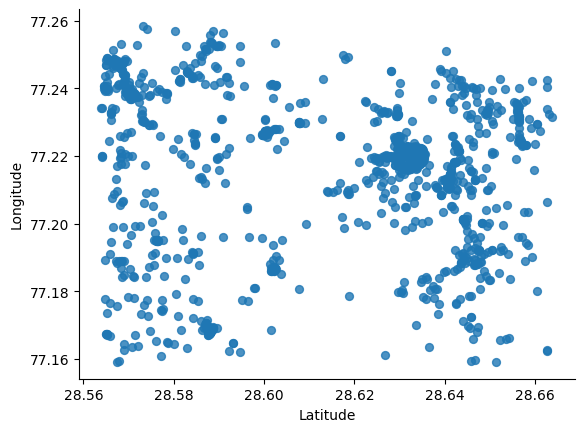

In [64]:
from matplotlib import pyplot as plt
df_filtered.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [67]:
# prompt: give numeric label to amenity type

import pandas as pd



# Create a dictionary to map amenity types to numeric labels
amenity_mapping = {amenity: i for i, amenity in enumerate(df_filtered['Amenity Type'].unique())}

# Create a new column 'Amenity Label' with the numeric labels
df_filtered['Amenity Label'] = df_filtered['Amenity Type'].map(amenity_mapping)

# Print the DataFrame with the new column
df_filtered

,Amenity Type,Latitude,Longitude,Amenity Label
0,bar,28.633277,77.223876,0
1,bar,28.641502,77.216079,0
2,bar,28.631405,77.220446,0
3,bar,28.638413,77.210406,0
4,bar,28.641130,77.212683,0
...,...,...,...,...
1274,place_of_worship,28.625921,77.211224,49
1275,place_of_worship,28.568385,77.247512,49
1276,public_bath,28.642282,77.223417,50
1277,public_bath,28.642434,77.222874,50


In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_Delhi_Metro_stations"

# Fetch the webpage
response = requests.get(url)
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing the station information
    tables = soup.find_all('table', class_='wikitable')

    for table in tables:
        # Process each row in the table
        rows = table.find_all('tr')
        for row in rows[1:]:  # Skip the header row
            columns = row.find_all('td')
            if columns:
                # Extract station name (first column)
                station_name = columns[0].text.strip()
                print(station_name)
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Elevated stations
Underground stations
At-grade stations
*
†*
††
**
#*
†¤
Adarsh Nagar
AIIMS
Akshardham
Anand Vihar**
Pink Line
Arjan Garh
Arthala
Ashok Park Main*
Ashram
Azadpur*
Pink Line
Badarpur Border
Badkhal Mor
Bahadurgarh City
Barakhamba Road††
Bata Chowk
Bhikaji Cama Place
Botanical Garden†*
Magenta Line
Brigadier Hoshiyar Singh†
Central Secretariat*
Violet Line
Chandni Chowk††
Chawri Bazar
Chhatarpur
Chirag Delhi
Civil Lines
Dabri Mor - Janakpuri South
Dashrath Puri
Delhi Aerocity
Delhi Cantonment
Delhi Gate
Dhansa Bus Stand†
Dhaula Kuan*
Dilli Haat - INA*
Pink Line
Dilshad Garden
Durgabai Deshmukh South Campus*
Dwarka†*
Grey Line
Dwarka Mor
Dwarka Sector 8
Dwarka Sector 9
Dwarka Sector 10
Dwarka Sector 11
Dwarka Sector 12
Dwarka Sector 13
Dwarka Sector 14
Dwarka Sector 21†*
Airport Express
East Azad Nagar
East Vinod Nagar - Mayur Vihar-II
Escorts Mujesar
ESI - Basaidarapur
Ghevra
Ghitorni
Gokulpuri
Golf Course
Govindpuri
Greater Kailash
Green Park
GTB Nagar
Guru Dronacharya


In [ ]:
from geopy.geocoders import Nominatim

# Initialize geocoder
geolocator = Nominatim(user_agent="geoapi")

# List of stations
stations = [
    "Arthala", "Ashok Park Main", "Ashram", "Azadpur", "Badarpur Border", "Badkhal Mor",
    "Bahadurgarh City", "Barakhamba Road", "Bata Chowk", "Bhikaji Cama Place", "Botanical Garden",
    "Brigadier Hoshiyar Singh", "Central Secretariat", "Chandni Chowk", "Chawri Bazar",
    "Chhatarpur", "Chirag Delhi", "Civil Lines", "Dabri Mor - Janakpuri South", "Dashrath Puri",
    "Delhi Aerocity", "Delhi Cantonment", "Delhi Gate", "Dhansa Bus Stand", "Dhaula Kuan",
    "Dilli Haat - INA", "Dilshad Garden", "Durgabai Deshmukh South Campus", "Dwarka", "Dwarka Mor",
    "Dwarka Sector 8", "Dwarka Sector 9", "Dwarka Sector 10", "Dwarka Sector 11", "Dwarka Sector 12",
    "Dwarka Sector 13", "Dwarka Sector 14", "Dwarka Sector 21", "Airport Express", "East Azad Nagar",
    "East Vinod Nagar - Mayur Vihar-II", "Escorts Mujesar", "ESI - Basaidarapur", "Ghevra",
    "Ghitorni", "Gokulpuri", "Golf Course", "Govindpuri", "Greater Kailash", "Green Park", "GTB Nagar",
    "Guru Dronacharya", "Haiderpur Badli Mor", "Harkesh Nagar Okhla", "Hauz Khas", "Hindon River",
    "HUDA City Centre", "IFFCO Chowk", "IIT Delhi", "Inderlok", "Indira Gandhi International Airport",
    "Indraprastha", "IP Extension", "ITO", "Jaffrabad", "Jahangirpuri", "Jama Masjid", "Jamia Millia Islamia",
    "Janakpuri East", "Janakpuri West", "Jangpura", "Janpath", "Jasola Apollo", "Jasola Vihar Shaheen Bagh",
    "Jawaharlal Nehru Stadium", "Jhandewalan", "Jhilmil", "Johri Enclave", "Jor Bagh", "Kailash Colony",
    "Kalindi Kunj", "Kalkaji Mandir", "Kanhaiya Nagar", "Karkarduma", "Karkarduma Court", "Karol Bagh",
    "Kashmere Gate", "Kaushambi", "Keshav Puram", "Khan Market", "Kirti Nagar", "Krishna Nagar", "Kohat Enclave",
    "Lajpat Nagar", "Lal Qila", "Laxmi Nagar", "Lok Kalyan Marg", "Madipur", "Maharaja Surajmal Stadium",
    "Majlis Park", "Major Mohit Sharma Rajendra Nagar", "Malviya Nagar", "Mandawali - West Vinod Nagar",
    "Mandi House", "Mansarovar Park", "Maujpur - Babarpur", "Mayapuri", "Mayur Vihar-I", "Mayur Vihar Extension",
    "Mayur Vihar Pocket I", "Mewla Maharajpur", "MG Road", "Model Town", "Mohan Estate", "Mohan Nagar",
    "Moolchand", "Moti Nagar", "Mundka", "Mundka Industrial Area", "Munirka", "Najafgarh", "Nangli",
    "Nangloi", "Nangloi Railway Station", "Naraina Vihar", "Nawada", "Neelam Chowk Ajronda", "Nehru Enclave",
    "Nehru Place", "Netaji Subhash Place", "New Ashok Nagar", "New Delhi", "NHPC Chowk", "Nirman Vihar",
    "Noida City Centre", "Noida Electronic City", "Noida Sector 15", "Noida Sector 16", "Noida Sector 18",
    "Noida Sector 34", "Noida Sector 52", "Noida Sector 59", "Noida Sector 61", "Noida Sector 62",
    "Okhla Bird Sanctuary", "Okhla NSIC", "Okhla Vihar", "Old Faridabad", "Palam", "Panchsheel Park",
    "Pandit Shree Ram Sharma", "Paschim Vihar East", "Paschim Vihar West", "Patel Chowk", "Patel Nagar",
    "Peeragarhi", "Pitampura", "Pratap Nagar", "Preet Vihar", "Pul Bangash", "Punjabi Bagh", "Punjabi Bagh West",
    "Qutab Minar", "R. K. Puram", "Raja Nahar Singh", "Raj Bagh", "Rajdhani Park", "Rajendra Place",
    "Rajiv Chowk", "Rajouri Garden", "Ramakrishna Ashram Marg", "Ramesh Nagar", "Rithala", "Rohini East",
    "Rohini Sector 18", "Rohini Sector 19", "Rohini West", "Sadar Bazaar Cantonment", "Saket", "Samaypur Badli",
    "Sant Surdas (Sihi)", "Sarai", "Sarai Kale Khan - Nizamuddin", "Sarita Vihar", "Sarojini Nagar",
    "Satguru Ram Singh Marg", "Sector 28", "Seelampur", "Shadipur", "Shahdara", "Shaheed Nagar",
    "Shaheed Sthal", "Shakurpur", "Shalimar Bagh", "Shankar Vihar", "Shastri Nagar", "Shastri Park",
    "Shiv Vihar", "Shivaji Park", "Shivaji Stadium", "Shyam Park", "Sikanderpur", "Sir M. Vishweshwaraiah Moti Bagh",
    "South Extension", "Subhash Nagar", "Sukhdev Vihar", "Sultanpur", "Supreme Court", "Tagore Garden",
    "Terminal 1-IGI Airport", "Tikri Border", "Tikri Kalan", "Tilak Nagar", "Tis Hazari", "Trilokpuri Sanjay Lake",
    "Tughlakabad Station", "Udyog Bhawan", "Udyog Nagar", "Uttam Nagar East", "Uttam Nagar West",
    "Vaishali", "Vasant Vihar", "Vidhan Sabha", "Vinobapuri", "Vishwa Vidyalaya", "Welcome", "Yamuna Bank",
    "Yashobhoomi Dwarka"
]

# Function to fetch geolocation for each station
def fetch_location(station):
    location = geolocator.geocode(station)
    if location:
        return {
            "Name": location.address,
            "Latitude": location.latitude,
            "Longitude": location.longitude
        }
    else:
        return {"Name": station, "Latitude": "Not found", "Longitude": "Not found"}

# Fetch geolocation for each station
for station in stations:
    location_info = fetch_location(station)
    print(location_info)


{'Name': 'Arthala, Wazirabad Road, Ghaziabad, Uttar Pradesh, 201007, India', 'Latitude': 28.676999, 'Longitude': 77.3918919}
{'Name': 'Ashok Park Main, Rohtak Road, Rampura, Punjabi Bagh, Saraswati Vihar Tehsil, West Delhi, Delhi, 110035, India', 'Latitude': 28.6716045, 'Longitude': 77.155291}
{'Name': 'Ashram, Mathura Road, Friends Colony, Okhla, Defence Colony Tehsil, South East Delhi, Delhi, 110065, India', 'Latitude': 28.5724231, 'Longitude': 77.2585979}
{'Name': 'Azadpur (Pink Line), Mahatma Gandhi Marg, Jailer Wala Bagh, Model Town Tehsil, North Delhi, Delhi, 110009, India', 'Latitude': 28.7057821, 'Longitude': 77.1819488}
{'Name': 'Badarpur Border, Mathura Road, Badarpur, Sarita Vihar Tehsil, South East Delhi, Delhi, 110044, India', 'Latitude': 28.493282999999998, 'Longitude': 77.3033656665284}
{'Name': 'Badkhal Mor', 'Latitude': 'Not found', 'Longitude': 'Not found'}
{'Name': 'Bahadurgarh City, Najafgarh Bahadurgarh Road, Bahadurgarh, Jhajjar, Haryana, 124507, India', 'Latitude

In [ ]:
import osmnx as ox
import pandas as pd

# List of metro stations
stations = [
    "Adarsh Nagar", "AIIMS", "Akshardham", "Anand Vihar", "Arjan Garh", "Arthala",
    "Ashok Park Main", "Ashram", "Azadpur", "Badarpur Border", "Badkhal Mor",
    "Bahadurgarh City", "Barakhamba Road", "Bata Chowk", "Bhikaji Cama Place",
    "Botanical Garden", "Brigadier Hoshiyar Singh", "Central Secretariat", "Chandni Chowk",
    "Chawri Bazar", "Chhatarpur", "Chirag Delhi", "Civil Lines", "Dabri Mor - Janakpuri South",
    "Dashrath Puri", "Delhi Aerocity", "Delhi Cantonment", "Delhi Gate", "Dhansa Bus Stand",
    "Dhaula Kuan", "Dilli Haat - INA", "Dilshad Garden", "Durgabai Deshmukh South Campus",
    "Dwarka", "Dwarka Mor", "Dwarka Sector 8", "Dwarka Sector 9", "Dwarka Sector 10",
    "Dwarka Sector 11", "Dwarka Sector 12", "Dwarka Sector 13", "Dwarka Sector 14",
    "Dwarka Sector 21", "East Azad Nagar", "East Vinod Nagar - Mayur Vihar-II", "Escorts Mujesar",
    "ESI - Basaidarapur", "Ghevra", "Ghitorni", "Gokulpuri", "Golf Course", "Govindpuri",
    "Greater Kailash", "Green Park", "GTB Nagar", "Guru Dronacharya", "Haiderpur Badli Mor",
    "Harkesh Nagar Okhla", "Hauz Khas", "Hindon River", "HUDA City Centre", "IFFCO Chowk",
    "IIT Delhi", "Inderlok", "Indira Gandhi International Airport", "Indraprastha", "IP Extension",
    "ITO", "Jaffrabad", "Jahangirpuri", "Jama Masjid", "Jamia Millia Islamia", "Janakpuri East",
    "Janakpuri West", "Jangpura", "Janpath", "Jasola Apollo", "Jasola Vihar Shaheen Bagh",
    "Jawaharlal Nehru Stadium", "Jhandewalan", "Jhilmil", "Johri Enclave", "Jor Bagh", "Kailash Colony",
    "Kalindi Kunj", "Kalkaji Mandir", "Kanhaiya Nagar", "Karkarduma", "Karkarduma Court", "Karol Bagh",
    "Kashmere Gate", "Kaushambi", "Keshav Puram", "Khan Market", "Kirti Nagar", "Krishna Nagar",
    "Kohat Enclave", "Lajpat Nagar", "Lal Qila", "Laxmi Nagar", "Lok Kalyan Marg", "Madipur",
    "Maharaja Surajmal Stadium", "Majlis Park", "Malviya Nagar", "Mandi House", "Mansarovar Park",
    "Maujpur - Babarpur", "Mayapuri", "Mayur Vihar-I", "Mayur Vihar Extension", "Mayur Vihar Pocket I",
    "Mewla Maharajpur", "MG Road", "Model Town", "Mohan Estate", "Mohan Nagar", "Moolchand", "Moti Nagar",
    "Mundka", "Mundka Industrial Area", "Munirka", "Najafgarh", "Nangli", "Nangloi", "Nangloi Railway Station",
    "Naraina Vihar", "Nawada", "Neelam Chowk Ajronda", "Nehru Enclave", "Nehru Place", "Netaji Subhash Place",
    "New Ashok Nagar", "New Delhi", "NHPC Chowk", "Nirman Vihar", "Noida City Centre", "Noida Electronic City",
    "Noida Sector 15", "Noida Sector 16", "Noida Sector 18", "Noida Sector 34", "Noida Sector 52",
    "Noida Sector 59", "Noida Sector 61", "Noida Sector 62", "Okhla Bird Sanctuary", "Okhla NSIC",
    "Okhla Vihar", "Old Faridabad", "Palam", "Panchsheel Park", "Pandit Shree Ram Sharma",
    "Paschim Vihar East", "Paschim Vihar West", "Patel Chowk", "Patel Nagar", "Peeragarhi", "Pitampura",
    "Pratap Nagar", "Preet Vihar", "Pul Bangash", "Punjabi Bagh", "Punjabi Bagh West", "Qutab Minar",
    "R. K. Puram", "Raja Nahar Singh", "Raj Bagh", "Rajdhani Park", "Rajendra Place", "Rajiv Chowk",
    "Rajouri Garden", "Ramakrishna Ashram Marg", "Ramesh Nagar", "Rithala", "Rohini East", "Rohini Sector 18",
    "Rohini West", "Sadar Bazaar Cantonment", "Saket", "Samaypur Badli", "Sant Surdas (Sihi)", "Sarai",
    "Sarai Kale Khan - Nizamuddin", "Sarita Vihar", "Sarojini Nagar", "Satguru Ram Singh Marg",
    "Sector 28", "Seelampur", "Shadipur", "Shahdara", "Shaheed Nagar", "Shaheed Sthal", "Shakurpur",
    "Shalimar Bagh", "Shankar Vihar", "Shastri Nagar", "Shastri Park", "Shiv Vihar", "Shivaji Park",
    "Shivaji Stadium", "Shyam Park", "Sikanderpur", "Sir M. Vishweshwaraiah Moti Bagh", "South Extension",
    "Subhash Nagar", "Sukhdev Vihar", "Sultanpur", "Supreme Court", "Tagore Garden", "Terminal 1-IGI Airport",
    "Tikri Border", "Tikri Kalan", "Tilak Nagar", "Tis Hazari", "Trilokpuri Sanjay Lake", "Tughlakabad Station",
    "Udyog Bhawan", "Udyog Nagar", "Uttam Nagar East", "Uttam Nagar West", "Vaishali", "Vasant Vihar",
    "Vidhan Sabha", "Vinobapuri", "Vishwa Vidyalaya", "Welcome", "Yamuna Bank", "Yashobhoomi Dwarka"
]

# Create a list to hold the results
station_data = []

# Loop through the stations and get latitude, longitude
for station in stations:
    try:
        location = ox.geocode(station)
        if location:
            station_data.append({"station": station, "latitude": location[0], "longitude": location[1]})
    except Exception as e:
        print(f"Error with {station}: {e}")

# Convert to DataFrame
df = pd.DataFrame(station_data)

# Save to CSV
df.to_csv("delhi_metro_stations_coordinates.csv", index=False)

# Print the result
print(df.head())  # Print first few rows for verification


Error with Badkhal Mor: Nominatim could not geocode query 'Badkhal Mor'
Error with Maharaja Surajmal Stadium: Nominatim could not geocode query 'Maharaja Surajmal Stadium'
Error with Mewla Maharajpur: Nominatim could not geocode query 'Mewla Maharajpur'
Error with NHPC Chowk: Nominatim could not geocode query 'NHPC Chowk'
        station   latitude  longitude
0  Adarsh Nagar  28.716580  77.170422
1         AIIMS  28.566860  77.207806
2    Akshardham  28.612517  77.277318
3   Anand Vihar  28.646834  77.315875
4    Arjan Garh  28.480735  77.125762


In [ ]:
data='''{'Name': 'Arthala, Wazirabad Road, Ghaziabad, Uttar Pradesh, 201007, India', 'Latitude': 28.676999, 'Longitude': 77.3918919}
{'Name': 'Ashok Park Main, Rohtak Road, Rampura, Punjabi Bagh, Saraswati Vihar Tehsil, West Delhi, Delhi, 110035, India', 'Latitude': 28.6716045, 'Longitude': 77.155291}
{'Name': 'Ashram, Mathura Road, Friends Colony, Okhla, Defence Colony Tehsil, South East Delhi, Delhi, 110065, India', 'Latitude': 28.5724231, 'Longitude': 77.2585979}
{'Name': 'Azadpur (Pink Line), Mahatma Gandhi Marg, Jailer Wala Bagh, Model Town Tehsil, North Delhi, Delhi, 110009, India', 'Latitude': 28.7057821, 'Longitude': 77.1819488}
{'Name': 'Badarpur Border, Mathura Road, Badarpur, Sarita Vihar Tehsil, South East Delhi, Delhi, 110044, India', 'Latitude': 28.493282999999998, 'Longitude': 77.3033656665284}
{'Name': 'Badkhal Mor', 'Latitude': 'Not found', 'Longitude': 'Not found'}
{'Name': 'Bahadurgarh City, Najafgarh Bahadurgarh Road, Bahadurgarh, Jhajjar, Haryana, 124507, India', 'Latitude': 28.6907783, 'Longitude': 76.9354807}
{'Name': 'Barakhamba Road, Shankar Market, Chanakya Puri Tehsil, New Delhi, Delhi, 110001, India', 'Latitude': 28.62803615, 'Longitude': 77.22784415}
{'Name': 'Bata Chowk, Mathura Road, Krishna Nagar, Faridabad, Haryana, 121001, India', 'Latitude': 28.38594425, 'Longitude': 77.31343424673844}
{'Name': 'Bhikaji Cama Place, Shaheed Sudhir Tyagi Marg, Netaji Nagar Market, Netaji Nagar, Vasant Vihar Tehsil, New Delhi, Delhi, 110023, India', 'Latitude': 28.5702618, 'Longitude': 77.1878709}
{'Name': 'Ботанический сад, 1-я улица Леонова, район Ростокино, Москва, Центральный федеральный округ, 127490, Россия', 'Latitude': 55.8448445, 'Longitude': 37.6382462}
{'Name': 'Brigadier Hoshiyar Singh, SH22, Bahadurgarh, Jhajjar, Haryana, 124507, India', 'Latitude': 28.6974603, 'Longitude': 76.9192027}
{'Name': 'Central Secretariat, Rafi Ahmed Kidwai Marg, Chanakya Puri Tehsil, New Delhi, Delhi, 110004, India', 'Latitude': 28.6158758, 'Longitude': 77.2123449}
{'Name': 'Chandni Chowk, Old Delhi, Kotwali Tehsil, Central Delhi, Delhi, 110006, India', 'Latitude': 28.6559834, 'Longitude': 77.2321937}
{'Name': 'Chawri Bazar, Chawri Bazaar, Old Delhi, Kotwali Tehsil, Central Delhi, Delhi, 110006, India', 'Latitude': 28.65018033165322, 'Longitude': 77.22946140249951}
{'Name': 'Chhatarpur, Madhya Pradesh, India', 'Latitude': 24.760608949999998, 'Longitude': 79.67817759088484}
{'Name': 'Chirag Delhi, Hauz Khas Tehsil, South Delhi, Delhi, India', 'Latitude': 28.5381411, 'Longitude': 77.2280694}
{'Name': 'Civil Lines Tehsil, Central Delhi, Delhi, India', 'Latitude': 28.6806862, 'Longitude': 77.2225999}
{'Name': 'Dabri Mor - Janakpuri South, Dabri Mor Flyover, Janakpuri, Dwarka Tehsil, South West Delhi, Delhi, 110058, India', 'Latitude': 28.61572, 'Longitude': 77.0851893}
{'Name': 'Dashrath Puri, Dabri Palam Road, Dabri Village, DABRI, Dwarka Tehsil, South West Delhi, Delhi, 110045, India', 'Latitude': 28.60185, 'Longitude': 77.0823751}
{'Name': 'Delhi Aerocity, Mahipalpur Flyover, Mahipalpur, Vasant Vihar Tehsil, New Delhi, Delhi, 110037, India', 'Latitude': 28.5487786, 'Longitude': 77.1207949}
{'Name': 'Delhi Cantonment, New Delhi, Delhi, India', 'Latitude': 28.5888565, 'Longitude': 77.132399}
{'Name': 'Delhi Gate, Bahadur Shah Zafar Marg, Kotwali Tehsil, Central Delhi, Delhi, 110002, India', 'Latitude': 28.6392174, 'Longitude': 77.2407795}
{'Name': 'Dhansa Bus Stand, Najafgarh Dhansa Road, Najafgarh, Najafgarh Tehsil, South West Delhi, Delhi, 110043, India', 'Latitude': 28.6119086, 'Longitude': 76.9785264}
{'Name': 'Dhaula Kuan, NH48, Arjun Vihar, Dhaula Kuan, Delhi Cantonment, New Delhi, Delhi, 110010, India', 'Latitude': 28.5918719, 'Longitude': 77.1617158}
{'Name': 'Dilli Haat - INA, Aurobindo Marg, Kidwai Nagar, Vasant Vihar Tehsil, New Delhi, Delhi, 110029, India', 'Latitude': 28.5741693, 'Longitude': 77.2092708}
{'Name': 'Dilshad Garden, GT Road, Jeevan Sarita, Dilshad Garden, Vivek Vihar Tehsil, Shahdara, Delhi, 110095, India', 'Latitude': 28.6758864, 'Longitude': 77.32144601267456}
{'Name': 'Durgabai Deshmukh South Campus, Mahatma Gandhi Marg, Delhi Cantonment, Vasant Vihar Tehsil, New Delhi, Delhi, 110021, India', 'Latitude': 28.5892816, 'Longitude': 77.1694377}
{'Name': 'Dwarka, Okhamandal Taluka, Devbhumi Dwaraka, Gujarat, 361335, India', 'Latitude': 22.2408009, 'Longitude': 68.9662602}
{'Name': 'Dwarka Mor, Shivaji Marg, R Block, Nawada, West Delhi, Delhi, 110059, India', 'Latitude': 28.61931, 'Longitude': 77.0332792}
{'Name': 'Dwarka Sector 8, Road 205, Delhi Cantonment, Sector 21, New Delhi, Dwarka Tehsil, South West Delhi, Delhi, 110077, India', 'Latitude': 28.5656109, 'Longitude': 77.0670366}
{'Name': 'Dwarka Sector 9, Road 205, Delhi Cantonment, Sector 9, Dwarka, Dwarka Tehsil, South West Delhi, Delhi, 110077, India', 'Latitude': 28.574272, 'Longitude': 77.0653316}
{'Name': 'Dwarka Sector 10, Road 224, Sector 10, Dwarka, Dwarka Tehsil, South West Delhi, Delhi, 110077, India', 'Latitude': 28.5810577, 'Longitude': 77.0574996}
{'Name': 'Dwarka Sector 11, Road 221, Sector 11, Dwarka, Dwarka Tehsil, South West Delhi, Delhi, 110075, India', 'Latitude': 28.586443, 'Longitude': 77.0494433}
{'Name': 'Dwarka Sector 12, Road 205, Sector 12, Dwarka, Dwarka Tehsil, South West Delhi, Delhi, 110078, India', 'Latitude': 28.5922362, 'Longitude': 77.0407315}
{'Name': 'Dwarka Sector 13, Internal road, metro view apartments, Sector 13, Dwarka, Dwarka Tehsil, South West Delhi, Delhi, 110078, India', 'Latitude': 28.597009, 'Longitude': 77.0335407}
{'Name': 'Dwarka Sector 14, Road 205, Sector 13, Dwarka, Dwarka Tehsil, South West Delhi, Delhi, 110078, India', 'Latitude': 28.6022218, 'Longitude': 77.0259765}
{'Name': 'Dwarka Sector 21, Dwarka Sector 21 Underpass, Dwarka, Kapashera Tehsil, South West Delhi, Delhi, 110061, India', 'Latitude': 28.5519218, 'Longitude': 77.0585605}
{'Name': 'Airport express, Heydər Əliyev pr., Nizami rayonu, Bakı İnzibati Ərazisi, Azərbaycan', 'Latitude': 40.4215322, 'Longitude': 49.9166003}
{'Name': 'East Azad Nagar, Road Number 57, Bihari Colony, Vivek Vihar Tehsil, Shahdara, Delhi, 110032, India', 'Latitude': 28.6646764, 'Longitude': 77.2848431}
{'Name': 'East Vinod Nagar - Mayur Vihar - II, Rohit Khatri Marg, East Vinod Nagar, Mayur Vihar, Mayur Vihar Tehsil, East Delhi, Delhi, 110091, India', 'Latitude': 28.6200437, 'Longitude': 77.3054069}
{'Name': 'Escorts Mujesar, Mathura Road, Sector 11, Faridabad, Haryana, 121001, India', 'Latitude': 28.370078499999998, 'Longitude': 77.31492286994653}
{'Name': 'ESI - Basaidarapur, Ring Road, West Delhi, Delhi, 110026, India', 'Latitude': 28.6580809, 'Longitude': 77.1272304}
{'Name': 'Ghevra, NH9, Kanjhawalan Tehsil, North West Delhi, Delhi, 110072, India', 'Latitude': 28.6852384, 'Longitude': 76.9961591}
{'Name': 'Ghitorni, Vasant Vihar Tehsil, New Delhi, Delhi, 110047, India', 'Latitude': 28.4931214, 'Longitude': 77.1424868}
{'Name': 'Gokulpuri, Wazirabad Road, Yamuna Vihar, Yamuna Vihar Tehsil, North East Delhi, Delhi, 110093, India', 'Latitude': 28.7024752, 'Longitude': 77.2861253}
{'Name': 'Golf Course, Shaheed Captain Shashikant Sharma Marg, Nithari, Noida, Dadri, Gautam Buddha Nagar, Uttar Pradesh, 201301, India', 'Latitude': 28.5673755, 'Longitude': 77.3463247}
{'Name': 'Govindpuri, Govindnagar Flyover, Kanpur, Kanpur Nagar, Uttar Pradesh, 208006, India', 'Latitude': 26.4536771, 'Longitude': 80.312879}
{'Name': 'Greater Kailash, Ho Chi Minh Marg, Alaknanda, Kalkaji Tehsil, South East Delhi, Delhi, 110048, India', 'Latitude': 28.5419077, 'Longitude': 77.2384925}
{'Name': "Green Park, Piccadilly, St. James's, Mayfair, London, Greater London, England, W1J 8HY, United Kingdom", 'Latitude': 51.5066192, 'Longitude': -0.1429113}
{'Name': 'GTB Nagar, Mahatma Gandhi Marg, Mukherjee Nagar, Civil Lines Tehsil, Model Town Tehsil, North Delhi, Delhi, 110009, India', 'Latitude': 28.6981333, 'Longitude': 77.2063998}
{'Name': 'Guru Dronacharya, Mehrauli Gurgaon Road, Sector 24, Gurgaon, Gurugram, Haryana, 122010, India', 'Latitude': 28.4820212, 'Longitude': 77.1022685}
{'Name': 'Haiderpur Badli Mor, Outer Ring Road, Govind Mohalla, Alipur Tehsil, North Delhi, Delhi, 110089, India', 'Latitude': 28.7299398, 'Longitude': 77.1491044}
{'Name': 'Harkesh Nagar Okhla, Ram Dulari Tundelkar Ji Road, Okhla Phase - II, Sarita Vihar Tehsil, South East Delhi, Delhi, 110076, India', 'Latitude': 28.5431808, 'Longitude': 77.275351}
{'Name': 'Hauz Khas, Hauz Khas Tehsil, South Delhi, Delhi, India', 'Latitude': 28.54980865, 'Longitude': 77.20776381852018}
{'Name': 'Hindon River, Uttar Pradesh, India', 'Latitude': 29.1919301, 'Longitude': 77.481131}
{'Name': 'Millennium City Centre Gurugram, Flyover, Sector 29, Gurgaon, Gurugram, Haryana, 122022, India', 'Latitude': 28.4593429, 'Longitude': 77.0726571}
{'Name': 'IFFCO Chowk, August Kranti Marg, IFFCO Chowk, Sector 29, Gurgaon, Gurugram, Haryana, 122022, India', 'Latitude': 28.4723277, 'Longitude': 77.0724222}
{'Name': 'Indian Institute of Technology Delhi, JC Bose Marg, Hauz Khas, Hauz Khas Tehsil, South Delhi, Delhi, 110067, India', 'Latitude': 28.54499705, 'Longitude': 77.18915056744521}
{'Name': 'Inderlok (Red Line), Inderlok Metro Station, Maharaja Nahar Singh Marg, Shanti Nagar, Saraswati Vihar Tehsil, North West Delhi, Delhi, 110052, India', 'Latitude': 28.6735891, 'Longitude': 77.1703467}
{'Name': 'Indira Gandhi International Airport, Aerocity Underpass, Bana Singh Enclave, Vasant Vihar Tehsil, New Delhi, Delhi, 110010, India', 'Latitude': 28.5551678, 'Longitude': 77.08473721064372}
{'Name': 'Indraprastha, Mahatma Gandhi Marg, Kotwali Tehsil, Central Delhi, Delhi, 110503, India', 'Latitude': 28.6206019, 'Longitude': 77.249551}
{'Name': 'IP Extension, Road Number 57A, Indraprastha Extension, Preet Vihar Tehsil, East Delhi, Delhi, 110092, India', 'Latitude': 28.6319012, 'Longitude': 77.31073275633294}
{'Name': '伊東市, 静岡県, 日本', 'Latitude': 34.9656621, 'Longitude': 139.101729}
{'Name': 'Jaffrabad, Jafrabad Main Road, Gorakh Park, Babarpur, Shahdara Tehsil, Shahdara, Delhi, 110053, India', 'Latitude': 28.6826822, 'Longitude': 77.2748055}
{'Name': 'Jahangirpuri, Mall Road Extension, Jahangir Puri, Model Town Tehsil, North Delhi, Delhi, 110033, India', 'Latitude': 28.7259717, 'Longitude': 77.162658}
{'Name': 'Jama Masjid, Meena Bazaar, Old Delhi, Kotwali Tehsil, Central Delhi, Delhi, 110006, India', 'Latitude': 28.6506822, 'Longitude': 77.23296096363757}
{'Name': 'Jamia Millia Islamia, Main road, Zakir Bagh, Defence Colony Tehsil, South East Delhi, Delhi, 110025, India', 'Latitude': 28.55849025, 'Longitude': 77.28116473551759}
{'Name': 'Janakpuri East, Shivaji Marg, Vikaspuri, Rajouri Garden Tehsil, West Delhi, Delhi, 110018, India', 'Latitude': 28.633027, 'Longitude': 77.086709}
{'Name': 'Janakpuri West, Shivaji Marg, Vikaspuri, West Delhi, Delhi, 110018, India', 'Latitude': 28.6295839, 'Longitude': 77.078085}
{'Name': 'Jangpura, Shri Kuldeep Singh Gujral Marg, Defence Colony Tehsil, South East Delhi, Delhi, 110014, India', 'Latitude': 28.5830386, 'Longitude': 77.2393151}
{'Name': 'Janpath, Connaught Place, Chanakya Puri Tehsil, New Delhi, Delhi, 110001, India', 'Latitude': 28.6240485, 'Longitude': 77.2192587}
{'Name': 'Jasola Apollo, Okhla Estate Marg Flyover, Sarita Vihar Tehsil, South East Delhi, Delhi, 110076, India', 'Latitude': 28.53815975, 'Longitude': 77.2832547762401}
{'Name': 'Jasola Vihar Shaheen Bagh, DND-KMP Expressway, Jasola, Shaheen Bagh, Sarita Vihar Tehsil, South East Delhi, Delhi, 110044, India', 'Latitude': 28.5458279, 'Longitude': 77.2966578}
{'Name': 'Jawaharlal Nehru Stadium, Bhishma Pitamah Marg, Kasturba Nagar, South Extension, Defence Colony Tehsil, South East Delhi, Delhi, 110003, India', 'Latitude': 28.58337705, 'Longitude': 77.23354040287734}
{'Name': 'Jhandewalan, Panchkuian Road, Jhandewalan, Chanakya Puri Tehsil, New Delhi, Central Delhi, Delhi, 110055, India', 'Latitude': 28.6443188, 'Longitude': 77.1999165}
{'Name': 'Jhilmil, G.T Road, Jeevan Sarita, Dilshad Garden, Vivek Vihar Tehsil, Shahdara, Delhi, 110095, India', 'Latitude': 28.6757197, 'Longitude': 77.3123949}
{'Name': 'Johri Enclave, Loni Road, Loni, Ghaziabad, Karawal Nagar Tehsil, Ghaziabad, Uttar Pradesh, 110094, India', 'Latitude': 28.7128806, 'Longitude': 77.2901293}
{'Name': 'Jor Bagh, Aurobindo Marg, Jor Bagh, Chanakya Puri Tehsil, New Delhi, Defence Colony Tehsil, South East Delhi, Delhi, 100011, India', 'Latitude': 28.5865094, 'Longitude': 77.2125273}
{'Name': 'Kailash Colony, Kalkaji Tehsil, South East Delhi, Delhi, 110048, India', 'Latitude': 28.5530522, 'Longitude': 77.2429694}
{'Name': 'Kalindi Kunj, Amrapali Marg, Shaheen Bagh, Sarita Vihar Tehsil, South East Delhi, Delhi, 201313, India', 'Latitude': 28.542916, 'Longitude': 77.3101107}
{'Name': 'Kalkaji Mandir, Nehru Place Road, Nehru Place, Kalkaji Tehsil, South East Delhi, Delhi, 110019, India', 'Latitude': 28.5503522, 'Longitude': 77.2569441}
{'Name': 'Kanhaiya Nagar, Kanhiya Nagar Metro Station, Maharaja Nahar Singh Marg, Shanti Nagar, Saraswati Vihar Tehsil, North West Delhi, Delhi, 110035, India', 'Latitude': 28.6824082, 'Longitude': 77.1647754}
{'Name': 'Karkarduma (Pink Line), Karkarduma Metro Station (Pink Line), Bhartendu Harish Chandra Marg, Dayanand Vihar, Vivek Vihar Tehsil, Shahdara, Delhi, 110051, India', 'Latitude': 28.6493434, 'Longitude': 77.3060686}
{'Name': 'Karkarduma Court, Karkardooma Court Metro Station, Maharaj Surajmal Marg, Karkarduma, Vivek Vihar Tehsil, Shahdara, Delhi, 110051, India', 'Latitude': 28.6536001, 'Longitude': 77.2957877}
{'Name': 'Karol Bagh Tehsil, Central Delhi, Delhi, 110055, India', 'Latitude': 28.6529982, 'Longitude': 77.1890227}
{'Name': 'Kashmere Gate, Old Delhi, Kotwali Tehsil, Central Delhi, Delhi, 110006, India', 'Latitude': 28.6655672, 'Longitude': 77.228819}
{'Name': 'Kaushambi, Uttar Pradesh, India', 'Latitude': 25.5342456, 'Longitude': 81.44935673966953}
{'Name': 'Keshav Puram, Maharaja Nahar Singh Marg, Shanti Nagar, Saraswati Vihar Tehsil, North West Delhi, Delhi, 110035, India', 'Latitude': 28.6889264, 'Longitude': 77.1616833}
{'Name': 'Khan Market, Lodhi Estate, Rabindra Nagar, Chanakya Puri Tehsil, New Delhi, Delhi, 110003, India', 'Latitude': 28.599514096661764, 'Longitude': 77.22597849533805}
{'Name': 'Kirti Nagar (Green Line), Shadipur Flyover, Shadipur, Patel Nagar, West Delhi, Delhi, 110015, India', 'Latitude': 28.6545409, 'Longitude': 77.1513605}
{'Name': 'Krishna Nagar, Ward 96 Yousufguda, Greater Hyderabad Municipal Corporation Central Zone, Hyderabad, Shaikpet mandal, Hyderabad, Telangana, 500045, India', 'Latitude': 17.4330523, 'Longitude': 78.4246746}
{'Name': 'Kohat Enclave, Power House Road, Pitampura, Saraswati Vihar Tehsil, North West Delhi, Delhi, 110034, India', 'Latitude': 28.6980415, 'Longitude': 77.1405393}
{'Name': 'Lajpat Nagar, Defence Colony Tehsil, South East Delhi, Delhi, 110065, India', 'Latitude': 28.5660924, 'Longitude': 77.2432851}
{'Name': 'LaL QiLa, 3, Nelkenweg, Siemens-Siedlung, Obersendling, Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln, München, Bayern, 81379, Deutschland', 'Latitude': 48.1012859, 'Longitude': 11.5238504}
{'Name': 'Laxmi Nagar, Great Nicobar, Nicobar, Andaman and Nicobar Islands, India', 'Latitude': 6.8952194, 'Longitude': 93.8898315}
{'Name': 'Lok Kalyan Marg, Tughlaq Road, Safdarjung, Chanakya Puri Tehsil, New Delhi, Delhi, 110011, India', 'Latitude': 28.5973513, 'Longitude': 77.2110967}
{'Name': 'Madipur, Rohtak Road, Punjabi Bagh Tehsil, West Delhi, Delhi, 110056, India', 'Latitude': 28.6764752, 'Longitude': 77.1193599}
{'Name': 'Maharaja Surajmal Stadium', 'Latitude': 'Not found', 'Longitude': 'Not found'}
{'Name': 'Majlis Park, Arihant Marg, Model Town Tehsil, North Delhi, Delhi, 110033, India', 'Latitude': 28.7244312, 'Longitude': 77.181964}
{'Name': 'Major Mohit Sharma Rajendra Nagar, GT Road, Shaheed Nagar, Rajendra Nagar, Ghaziabad, Uttar Pradesh, 201011, India', 'Latitude': 28.6776112, 'Longitude': 77.3581426}
{'Name': 'Malviya Nagar, Hauz Khas Tehsil, South Delhi, Delhi, India', 'Latitude': 28.5339201, 'Longitude': 77.2124474}
{'Name': 'Mandawali - West Vinod Nagar, Shri Hanuman Marg, Indraprastha Extension, Preet Vihar Tehsil, East Delhi, Delhi, 110091, India', 'Latitude': 28.624979, 'Longitude': 77.3044525}
{'Name': 'Mandi House, Sikandra Road, Connaught Place, Chanakya Puri Tehsil, New Delhi, Delhi, 020626, India', 'Latitude': 28.6255149, 'Longitude': 77.2341926}
{'Name': 'Mansarovar Park, Mansrovar Park Metro Station, G.T Road, Jhilmil Colony, Vivek Vihar, Vivek Vihar Tehsil, Shahdara, Delhi, 110095, India', 'Latitude': 28.675385, 'Longitude': 77.3008678}
{'Name': 'Maujpur-Babarpur, Jafrabad Main Road, Gorakh Park, Babarpur, Shahdara Tehsil, Shahdara, Delhi, 110053, India', 'Latitude': 28.6920781, 'Longitude': 77.2796973}
{'Name': 'Mayapuri, Mayapuri Road, Naraina, Delhi Cantonment, New Delhi, Delhi, 110027, India', 'Latitude': 28.6371795, 'Longitude': 77.1297333}
{'Name': 'Mayur Vihar - I (Blue Line), Dadri Road, Mayur Vihar I Pocket - 4, Mayur Vihar, Mayur Vihar Tehsil, East Delhi, Delhi, 110091, India', 'Latitude': 28.604064, 'Longitude': 77.2895398}
{'Name': 'Mayur Vihar Extension, Mayur Vihar Flyover, Mayur Vihar Tehsil, East Delhi, Delhi, 110091, India', 'Latitude': 28.59419145, 'Longitude': 77.29462345}
{'Name': 'Mayur Vihar I Pocket - 4, Mayur Vihar, Mayur Vihar Tehsil, East Delhi, Delhi, 110091, India', 'Latitude': 28.603133, 'Longitude': 77.2925892}
{'Name': 'Mewla Maharajpur', 'Latitude': 'Not found', 'Longitude': 'Not found'}
{'Name': 'Mahatma Gandhi Road, Tasker Town, Shanthala Nagar, Bengaluru, Bangalore North, Bengaluru Urban, Karnataka, 560001, India', 'Latitude': 12.9755264, 'Longitude': 77.6067902}
{'Name': 'Model Town, Model Town Tehsil, North Delhi, Delhi, India', 'Latitude': 28.707334, 'Longitude': 77.1885231}
{'Name': 'Mohan Estate, Mathura Road, Sarita Vihar Tehsil, South East Delhi, Delhi, 110044, India', 'Latitude': 28.519589500000002, 'Longitude': 77.29458455034757}
{'Name': 'Mohan Nagar, GT Road, Rajendra Nagar, Ghaziabad, Uttar Pradesh, 201005, India', 'Latitude': 28.6785372, 'Longitude': 77.3840026}
{'Name': 'MOOLCHAND, Dehradun, Uttarakhand, 248001, India', 'Latitude': 30.31840995, 'Longitude': 78.06894510240775}
{'Name': 'Moti Nagar, Shivaji Marg, West Delhi, Delhi, 110026, India', 'Latitude': 28.657859, 'Longitude': 77.1424288}
{'Name': 'Mundka, Punjabi Bagh Tehsil, West Delhi, Delhi, 110041, India', 'Latitude': 28.6819261, 'Longitude': 77.0308105}
{'Name': 'Mundka Industrial Area, Rohtak Road, Kammruddin Nagar, Mundka, Punjabi Bagh Tehsil, West Delhi, Delhi, 110041, India', 'Latitude': 28.6833701, 'Longitude': 77.0171485}
{'Name': 'Munirka, Vasant Vihar Tehsil, New Delhi, Delhi, 110057, India', 'Latitude': 28.554886, 'Longitude': 77.1710841}
{'Name': 'Najafgarh, Shivaji Marg, Najafgarh, Najafgarh Tehsil, South West Delhi, Delhi, 110043, India', 'Latitude': 28.6124504, 'Longitude': 76.9865067}
{'Name': 'Nangli, Shivaji Marg, Gemini Park, Najafgarh, Dwarka Tehsil, South West Delhi, Delhi, 110043, India', 'Latitude': 28.6173003, 'Longitude': 77.0104375}
{'Name': 'Nangloi, Rohtak Road, Kammruddin Nagar, Mundka, Punjabi Bagh Tehsil, West Delhi, Delhi, 110041, India', 'Latitude': 28.6862813, 'Longitude': 77.0573608}
{'Name': 'Nangloi Railway Station, Rohtak Road, Kammruddin Nagar, Mundka, Punjabi Bagh Tehsil, West Delhi, Delhi, 110041, India', 'Latitude': 28.6822009, 'Longitude': 77.0562463}
{'Name': 'Naraina Vihar, Mahatma Gandhi Marg, Naraina, Delhi Cantonment, New Delhi, Delhi, 110028, India', 'Latitude': 28.6243852, 'Longitude': 77.1364438}
{'Name': 'Nawada, Bihar, India', 'Latitude': 24.817324900000003, 'Longitude': 85.51790846584018}
{'Name': 'Neelam Chowk Ajronda, Mathura Road, Arjondi, New Industrial Township, Faridabad, Haryana, 121001, India', 'Latitude': 28.3976584, 'Longitude': 77.31235576454071}
{'Name': 'Nehru Enclave, Outer Ring Road, Greater Kailash, Kalkaji Tehsil, South East Delhi, Delhi, 110019, India', 'Latitude': 28.5460584, 'Longitude': 77.2515057}
{'Name': 'Nehru Place, Kalkaji Tehsil, South East Delhi, Delhi, India', 'Latitude': 28.54925735, 'Longitude': 77.25295262558924}
{'Name': 'Netaji Subhash Place (Red Line), Red Line - Pink Line, Pacific Mall Pathway, Shalimar Bagh, Saraswati Vihar Tehsil, North West Delhi, Delhi, 110035, India', 'Latitude': 28.6960485, 'Longitude': 77.1524856}
{'Name': 'New Ashok Nagar, New Ashok Nagar Road, Mayur Vihar Tehsil, East Delhi, Delhi, 110091, India', 'Latitude': 28.5890885, 'Longitude': 77.3015085}
{'Name': 'New Delhi, Babu Ram Solanki Marg, Ram Nagar, Old Delhi, Kotwali Tehsil, Central Delhi, Delhi, 110055, India', 'Latitude': 28.64308585, 'Longitude': 77.21926705734865}
{'Name': 'NHPC Chowk', 'Latitude': 'Not found', 'Longitude': 'Not found'}
{'Name': 'Nirman Vihar, Nirman Vihar Metro Station, Vikas Marg, D Block, Laxmi Nagar, Preet Vihar Tehsil, East Delhi, Delhi, 110051, India', 'Latitude': 28.6364592, 'Longitude': 77.2868145}
{'Name': 'Noida City Centre, Shaheed Captain Shashikant Sharma Marg, Sector 35, Noida City Centre, Noida, Dadri, Gautam Buddha Nagar, Uttar Pradesh, 201301, India', 'Latitude': 28.5747334, 'Longitude': 77.3561638}
{'Name': 'Noida Electronic City, Shaheed Hawaldar Padam Singh Dhama Marg, Ghaziabad, Uttar Pradesh, 201309, India', 'Latitude': 28.6282627, 'Longitude': 77.3750033}
{'Name': 'Noida Sector 15, Lieutenant Vijyant Thapar Marg, Chilla, Noida, Dadri, Gautam Buddha Nagar, Uttar Pradesh, 201301, India', 'Latitude': 28.5848835, 'Longitude': 77.3116118}
{'Name': 'Noida Sector 16, Lieutenant Vijyant Thapar Marg, Sector 18, Noida, Dadri, Gautam Buddha Nagar, Uttar Pradesh, 201301, India', 'Latitude': 28.578081, 'Longitude': 77.3177778}
{'Name': 'Noida Sector 18, Lieutenant Vijyant Thapar Marg, Sector 18, Noida, Dadri, Gautam Buddha Nagar, Uttar Pradesh, 201301, India', 'Latitude': 28.5707583, 'Longitude': 77.3260756}
{'Name': 'Noida Sector 34, Shaheed Captain Shashikant Sharma Marg, Noida City Centre, Noida, Dadri, Gautam Buddha Nagar, Uttar Pradesh, 201301, India', 'Latitude': 28.5802538, 'Longitude': 77.3634917}
{'Name': 'Noida Sector 52, Shaheed Captain Shashikant Sharma Marg Underpass, Noida, Dadri, Gautam Buddha Nagar, Uttar Pradesh, 201301, India', 'Latitude': 28.5868739, 'Longitude': 77.3730237}
{'Name': 'Noida Sector 59, Shaheed Hawaldar Padam Singh Dharma Marg, Mamura, Noida, Dadri, Gautam Buddha Nagar, Uttar Pradesh, 201301, India', 'Latitude': 28.6065246, 'Longitude': 77.3727211}
{'Name': 'Noida Sector 61, Shaheed Hawaldar Padam Singh Dharma Marg, Mamura, Noida, Dadri, Gautam Buddha Nagar, Uttar Pradesh, 201301, India', 'Latitude': 28.5975854, 'Longitude': 77.3722663}
{'Name': 'Noida Sector 62, Shaheed Hawaldar Padam Singh Dharma Marg, Mamura, Noida, Dadri, Gautam Buddha Nagar, Uttar Pradesh, 201301, India', 'Latitude': 28.6169861, 'Longitude': 77.3735885}
{'Name': 'Okhla Bird Sanctuary, Noida, Dadri, Defence Colony Tehsil, Gautam Buddha Nagar, Uttar Pradesh, 201301, India', 'Latitude': 28.556986600000002, 'Longitude': 77.30900309623888}
{'Name': 'Okhla NSIC, Outer Ring Road, Kalkaji Tehsil, South East Delhi, Delhi, 110019, India', 'Latitude': 28.55451235, 'Longitude': 77.26494133984127}
{'Name': 'Okhla Vihar, Abul Fazal Road, Jasola, Shaheen Bagh, Defence Colony Tehsil, South East Delhi, Delhi, 110025, India', 'Latitude': 28.5613002, 'Longitude': 77.2919304}
{'Name': 'Old Faridabad, Faridabad, Haryana, 121001, India', 'Latitude': 28.4234963, 'Longitude': 77.3240399}
{'Name': 'Palam, Dwarka Tehsil, South West Delhi, Delhi, 110045, India', 'Latitude': 28.5918933, 'Longitude': 77.0828242}
{'Name': 'Panchsheel Park, Ho Chi Minh Marg, Saomi Nagar, Hauz Khas Tehsil, South Delhi, Delhi, 110017, India', 'Latitude': 28.5423747, 'Longitude': 77.2210916}
{'Name': 'Pandit Shree Ram Sharma, NH9, Bahadurgarh, Jhajjar, Haryana, 124507, India', 'Latitude': 28.689281, 'Longitude': 76.9511988}
{'Name': 'Paschim Vihar East, Rohtak Road, Punjabi Bagh Tehsil, West Delhi, Delhi, 110056, India', 'Latitude': 28.6773563, 'Longitude': 77.1122823}
{'Name': 'Paschim Vihar West, A1/10 Ground floor, Rohtak Road, Punjabi Bagh Tehsil, West Delhi, Delhi, 110063, India', 'Latitude': 28.67852, 'Longitude': 77.0997686}
{'Name': 'Patel Chowk, Ashoka Road, Connaught Place, Chanakya Puri Tehsil, New Delhi, Delhi, 110001, India', 'Latitude': 28.6229664, 'Longitude': 77.214031}
{'Name': 'Patel Nagar, Patel Road, South Patel Nagar, Patel Nagar, West Delhi, Delhi, 110008, India', 'Latitude': 28.6450127, 'Longitude': 77.1692817}
{'Name': 'Peeragarhi, Punjabi Bagh Tehsil, West Delhi, Delhi, India', 'Latitude': 28.67731415, 'Longitude': 77.09310243597042}
{'Name': 'Pitampura, Saraswati Vihar Tehsil, North West Delhi, Delhi, 110034, India', 'Latitude': 28.6995123, 'Longitude': 77.1301047}
{'Name': 'Pratap Nagar, Pratap Nagar Metro Station, Dina Nath Road, Sarai Rohilla, Civil Lines Tehsil, Central Delhi, Delhi, 110007, India', 'Latitude': 28.6667177, 'Longitude': 77.1988974}
{'Name': 'Preet Vihar, Preet Vihar Metro Station, Vikas Marg, D Block, Indraprastha Extension, Preet Vihar Tehsil, East Delhi, Delhi, 110051, India', 'Latitude': 28.6414409, 'Longitude': 77.2952594}
{'Name': 'Pul Bangash Metro Station, Pul Bangash, Rani Jhansi Road, Bara Hindu Rao, Civil Lines Tehsil, Central Delhi, Delhi, 110007, India', 'Latitude': 28.6663751, 'Longitude': 77.20752911898111}
{'Name': 'Punjabi Bagh, Rohtak Road, Rampura, Punjabi Bagh, Saraswati Vihar Tehsil, North West Delhi, Delhi, 110035, India', 'Latitude': 28.672995, 'Longitude': 77.1461239}
{'Name': 'Punjabi Bagh West, Ring Road, Saraswati Vihar Tehsil, North West Delhi, Delhi, 110026, India', 'Latitude': 28.6727671, 'Longitude': 77.1391976}
{'Name': 'Qutab Minar, Anuvrat Marg, Lado Sarai, Saket Tehsil, South Delhi, Delhi, 110030, India', 'Latitude': 28.512951, 'Longitude': 77.1864532}
{'Name': 'R. K. Puram, IIT Flyover, Hauz Khas, Vasant Vihar Tehsil, New Delhi, Hauz Khas Tehsil, South Delhi, Delhi, 110066, India', 'Latitude': 28.5503805, 'Longitude': 77.1855231}
{'Name': 'Raja Nahar Singh, Mathura Road, Rarehra Khera, Ballabgarh, Faridabad, Haryana, 121004, India', 'Latitude': 28.340002, 'Longitude': 77.3164509}
{'Name': 'Raj Bagh, GT Road, Shaheed Nagar, Rajendra Nagar, Ghaziabad, Uttar Pradesh, 201011, India', 'Latitude': 28.6770876, 'Longitude': 77.3468279}
{'Name': 'Rajdhani Park, Rohtak Road, Kammruddin Nagar, Mundka, Punjabi Bagh Tehsil, West Delhi, Delhi, 110041, India', 'Latitude': 28.6823085, 'Longitude': 77.0439437}
{'Name': 'Rajendra Place, Pusa Road, Karol Bagh Tehsil, Central Delhi, Delhi, 110060, India', 'Latitude': 28.6424955, 'Longitude': 77.1782756}
{'Name': 'Rajiv Chowk, Connaught Place, Chanakya Puri Tehsil, New Delhi, Delhi, 110001, India', 'Latitude': 28.6327786, 'Longitude': 77.2196985}
{'Name': 'Rajouri Garden (Pink Line), Ring Road, Rajouri Garden, West Delhi, Delhi, 110027, India', 'Latitude': 28.6511896, 'Longitude': 77.1242597}
{'Name': 'Ramakrishna Ashram Marg, Panchkuian Road, Connaught Place, Chanakya Puri Tehsil, New Delhi, Delhi, 110055, India', 'Latitude': 28.6392436, 'Longitude': 77.2085787}
{'Name': 'Ramesh Nagar, Shivaji Marg, West Delhi, Delhi, 110026, India', 'Latitude': 28.6527444, 'Longitude': 77.1316496}
{'Name': 'Rithala, Ram Murthi Pasi Marg, Sector 11, Rohini, Rohini Tehsil, North West Delhi, Delhi, 110085, India', 'Latitude': 28.7208064, 'Longitude': 77.1071813}
{'Name': 'Rohini East, Road Number B-5, Sector 14, Rohini, Alipur Tehsil, North Delhi, Delhi, 110089, India', 'Latitude': 28.7076609, 'Longitude': 77.1259664}
{'Name': 'Sector 18, Rohini, Alipur Tehsil, North Delhi, Delhi, India', 'Latitude': 28.73635755, 'Longitude': 77.13563584411656}
{'Name': 'Sector 19, Rohini, Alipur Tehsil, North Delhi, Delhi, India', 'Latitude': 28.7322834, 'Longitude': 77.13879891933696}
{'Name': 'Rohini West, HL Parwana Road, Sector 7, Rohini, Rohini Tehsil, North West Delhi, Delhi, 110085, India', 'Latitude': 28.7149569, 'Longitude': 77.115385}
{'Name': 'Sadar Bazaar Cantonment, Dwarka-Palam Road, Delhi Cantonment, New Delhi, Delhi, 110010, India', 'Latitude': 28.5771941, 'Longitude': 77.1111696}
{'Name': 'Saket, Mehrauli Badarpur Road, Lado Sarai, Hauz Khas Tehsil, South Delhi, Delhi, 110030, India', 'Latitude': 28.521168, 'Longitude': 77.2022237}
{'Name': 'Samaypur Badli, Samaypur Underpass, Samaipur Badli, Alipur Tehsil, North Delhi, Delhi, 110089, India', 'Latitude': 28.7446411, 'Longitude': 77.1382701}
{'Name': 'Sant Surdas (Sihi), Mathura Road, Sector 11, Faridabad, Haryana, 121001, India', 'Latitude': 28.3546659, 'Longitude': 77.31624738616993}
{'Name': 'Сараи, Сараевское городское поселение, Сараевский район, Рязанская область, Центральный федеральный округ, 391870, Россия', 'Latitude': 53.7212373, 'Longitude': 40.9967135}
{'Name': 'Sarai Kale Khan - Nizamuddin, Mahatma Gandhi Marg, Defence Colony Tehsil, South East Delhi, Delhi, 110013, India', 'Latitude': 28.5887494, 'Longitude': 77.2572494}
{'Name': 'Sarita Vihar, Defence Colony Tehsil, South East Delhi, Delhi, India', 'Latitude': 28.5334785, 'Longitude': 77.2935232}
{'Name': 'Sarojini Nagar, Cross Road Number 3, Sarojini Nagar, Vasant Vihar Tehsil, New Delhi, Delhi, 110023, India', 'Latitude': 28.575817, 'Longitude': 77.1980786}
{'Name': 'Satguru Ram Singh Marg, Naraina, Delhi Cantonment, New Delhi, Delhi, 110027, India', 'Latitude': 28.6374618, 'Longitude': 77.13011789999999}
{'Name': 'Sector 28, Mathura Road Flyover, Mewala Maharajpur, Faridabad, Haryana, 121001, India', 'Latitude': 28.4382044, 'Longitude': 77.3090566900561}
{'Name': 'Seelampur, Ajit Nagar Gali No. 5, Ajit Nagar, Vivek Vihar Tehsil, Shahdara, Delhi, 110031, India', 'Latitude': 28.6698165, 'Longitude': 77.2668137}
{'Name': 'Shadipur, Patel Road, Guru Arjun Nagar, Patel Nagar, West Delhi, Delhi, 110008, India', 'Latitude': 28.6515829, 'Longitude': 77.1582587}
{'Name': 'Shahdara, Delhi, India', 'Latitude': 28.6758661, 'Longitude': 77.29850776650815}
{'Name': 'Shaheed Nagar, GT Road, Shaheed Nagar, Rajendra Nagar, Ghaziabad, Uttar Pradesh, 201011, India', 'Latitude': 28.6766619, 'Longitude': 77.3339154}
{'Name': 'Shaheed Sthal, Mahamaya Stadium Road, Ghaziabad, Uttar Pradesh, 201001, India', 'Latitude': 28.6706449, 'Longitude': 77.4154736}
{'Name': 'Shakurpur, Mahatma Gandhi Road, Shalimar Bagh, Saraswati Vihar Tehsil, North West Delhi, Delhi, 110035, India', 'Latitude': 28.6857668, 'Longitude': 77.1496094}
{'Name': 'Shalimar Bagh, Nishat Harwan Road, Nishat, Tailbal(Habak Shanpora), Srīnagar, Srinagar, Jammu and Kashmir, 191123, India', 'Latitude': 34.14970725, 'Longitude': 74.87322796324241}
{'Name': 'Shankar Vihar, New Delhi, Delhi, 110010, India', 'Latitude': 28.55743865, 'Longitude': 77.13966548999556}
{'Name': 'Shastri Nagar, Swami Narayan Marg, Moti Bagh (East), Sarai Rohilla, Civil Lines Tehsil, Central Delhi, Delhi, 110052, India', 'Latitude': 28.6700885, 'Longitude': 77.1818589}
{'Name': 'Shastri Park, Footover Bridge, Seelampur, Seelam Pur Tehsil, North East Delhi, Delhi, 420420, India', 'Latitude': 28.6684339, 'Longitude': 77.2505301}
{'Name': 'Shiv Vihar, West Delhi, Delhi, India', 'Latitude': 28.6481226, 'Longitude': 77.05061238963813}
{'Name': 'Shivaji Park, G/N Ward, Zone 2, Mumbai, Mumbai City, Maharashtra, India', 'Latitude': 19.02727875, 'Longitude': 72.83839774905661}
{'Name': 'Shivaji Stadium, Baba Kharak Singh Marg, Connaught Place, Chanakya Puri Tehsil, New Delhi, Delhi, 110001, India', 'Latitude': 28.6288963, 'Longitude': 77.2113218}
{'Name': 'Shyam Park, GT Road, Rajendra Nagar, Ghaziabad, Uttar Pradesh, 201005, India', 'Latitude': 28.6782281, 'Longitude': 77.3706454}
{'Name': 'Sikanderpur, Mehrauli Gurgaon Road, Sector 25, Gurgaon, Gurugram, Haryana, 122010, India', 'Latitude': 28.4812716, 'Longitude': 77.0930017}
{'Name': 'Sir M. Vishweshwaraiah Moti Bagh, Rao Tula Ram Marg, Moti Bagh, Vasant Vihar Tehsil, New Delhi, Delhi, 110022, India', 'Latitude': 28.5785326, 'Longitude': 77.175741}
{'Name': 'South Extension, Mahatma Gandhi Marg, Kotla Mubarak, South Extension, Defence Colony Tehsil, South East Delhi, Delhi, 110049, India', 'Latitude': 28.5685664, 'Longitude': 77.2205677}
{'Name': 'Subhash Nagar, Shivaji Marg, Block 4, Tilak Nagar Industrial Area, Rajouri Garden Tehsil, West Delhi, Delhi, 110064, India', 'Latitude': 28.6404628, 'Longitude': 77.1052347}
{'Name': 'Sukhdev Vihar, MP Road, Pkt B, Kalkaji Tehsil, South East Delhi, Delhi, 110025, India', 'Latitude': 28.5597477, 'Longitude': 77.2749004}
{'Name': 'Sultanpur, Uttar Pradesh, India', 'Latitude': 26.260473150000003, 'Longitude': 82.23805321467546}
{'Name': 'Supreme Court, ITO Skywalk, Chanakya Puri Tehsil, New Delhi, Kotwali Tehsil, Central Delhi, Delhi, 110002, India', 'Latitude': 28.6216268, 'Longitude': 77.23908617808567}
{'Name': 'Tagore Garden, Shivaji Marg, Block 4, Tilak Nagar Industrial Area, Rajouri Garden Tehsil, West Delhi, Delhi, 110027, India', 'Latitude': 28.6437639, 'Longitude': 77.1128454}
{'Name': 'Terminal 1 IGI Airport, Uber Ola pickup road, Delhi Cantonment, New Delhi, Delhi, 110010, India', 'Latitude': 28.564835, 'Longitude': 77.1226566}
{'Name': 'Tikri Border, NH9, Punjabi Bagh Tehsil, West Delhi, Delhi, 110072, India', 'Latitude': 28.6880254, 'Longitude': 76.9640828}
{'Name': 'Tikri Kalan, NH9, Punjabi Bagh Tehsil, West Delhi, Delhi, 110072, India', 'Latitude': 28.6868849, 'Longitude': 76.9772082}
{'Name': 'Tilak Nagar, Shivaji Marg Flyover, Tilak Nagar Industrial Area, Rajouri Garden Tehsil, West Delhi, Delhi, 110018, India', 'Latitude': 28.6365482, 'Longitude': 77.0964961}
{'Name': 'Tis Hazari, Tis Hazari Metro Station, Lala Hardev Sahai Marg, Civil Lines, Civil Lines Tehsil, Central Delhi, Delhi, 110006, India', 'Latitude': 28.6671626, 'Longitude': 77.2166306}
{'Name': 'Trilokpuri Sanjay Lake, Kotla Road, Trilok Puri, Trilokpuri, Mayur Vihar Tehsil, East Delhi, Delhi, 110096, India', 'Latitude': 28.613453, 'Longitude': 77.3088549}
{'Name': 'Tughlakabad, Mathura Road, Badarpur, Sarita Vihar Tehsil, South East Delhi, Delhi, 110044, India', 'Latitude': 28.5034421, 'Longitude': 77.2970508}
{'Name': 'Udyog Bhawan, Maulana Azad Road, Chanakya Puri Tehsil, New Delhi, Delhi, 110011, India', 'Latitude': 28.6103927, 'Longitude': 77.213107}
{'Name': 'Udyog Nagar, Rohtak Road, Nangloi, Punjabi Bagh Tehsil, West Delhi, Delhi, 110083, India', 'Latitude': 28.681103, 'Longitude': 77.0808492}
{'Name': 'Uttam Nagar East, Shivaji Marg, Nawada, West Delhi, Delhi, 110059, India', 'Latitude': 28.6248465, 'Longitude': 77.0652861}
{'Name': 'Uttam Nagar West, Shivaji Marg, R Block, Nawada, West Delhi, Delhi, 110059, India', 'Latitude': 28.621757, 'Longitude': 77.0557122}
{'Name': 'Vaishali, Bihar, India', 'Latitude': 25.74917025, 'Longitude': 85.39721640385531}
{'Name': 'Vasant Vihar, Munirka Marg, Vasant Vihar, Delhi Cantonment, Vasant Vihar Tehsil, New Delhi, Delhi, 110057, India', 'Latitude': 28.557827, 'Longitude': 77.1611168}
{'Name': 'Vidhan Sabha, Ashok Marg, Ganesh Ganj, Lucknow, Uttar Pradesh, 226001, India', 'Latitude': 26.843382, 'Longitude': 80.94401840165287}
{'Name': 'Vinobapuri, Mahatma Gandhi Marg, Lajpat Nagar III, Lajpat Nagar, Defence Colony Tehsil, South East Delhi, Delhi, 110065, India', 'Latitude': 28.565871, 'Longitude': 77.2492973}
{'Name': 'Vishwa Vidyalaya, Mahatma Gandhi Marg, Chandrawal, Civil Lines Tehsil, Central Delhi, Delhi, 110054, India', 'Latitude': 28.6950772, 'Longitude': 77.2147459}
{'Name': 'Welcome, Davidson County, North Carolina, 27374, United States', 'Latitude': 35.909136849999996, 'Longitude': -80.25407273988517}
{'Name': 'Yamuna Bank, Vikas Marg, Laxmi Nagar, East Delhi, Delhi, 110031, India', 'Latitude': 28.6233124, 'Longitude': 77.268013}
{'Name': 'India International Convention and Expo Centre, Sector 25, Dwarka, Kapashera Tehsil, South West Delhi, Delhi, India', 'Latitude': 28.55195295, 'Longitude': 77.04267616843258}
'''

In [ ]:
import csv

# Raw data (string format as provided)


# Function to parse the raw data string and convert it to a list of dictionaries
def parse_data(data):
    # Split the raw data into individual station strings
    lines = data.strip().split("\n")

    # List to hold the station data in dictionary format
    parsed_data = []

    for line in lines:
        # Remove leading/trailing spaces and convert the string to a dictionary
        line = line.strip()
        station = eval(line)  # Using eval to convert the string into a dictionary
        parsed_data.append(station)

    return parsed_data

# Parse the raw data string into a list of dictionaries
stations = parse_data(data)

# Define the CSV file name
csv_filename = "stations_locations.csv"

# Writing to CSV file
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["Name", "Latitude", "Longitude"])
    writer.writeheader()
    for station in stations:
        # If latitude or longitude is 'Not found', replace it with None
        if station['Latitude'] == 'Not found':
            station['Latitude'] = None
        if station['Longitude'] == 'Not found':
            station['Longitude'] = None

        writer.writerow(station)

print(f"Data has been saved to {csv_filename}")


Data has been saved to stations_locations.csv


In [70]:
import pandas as pd

df_station = pd.read_csv('/content/delhi_metro_stations.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


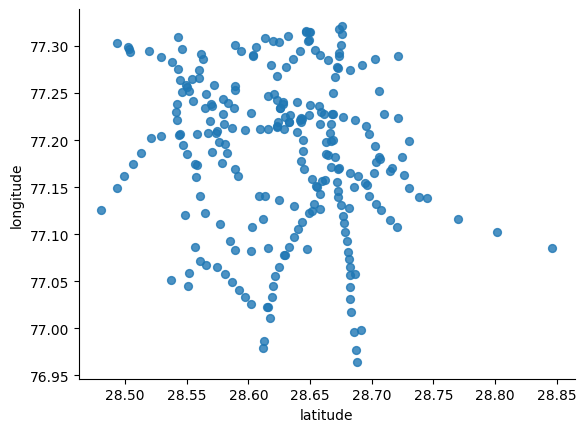

In [71]:
from matplotlib import pyplot as plt
df_station.plot(kind='scatter', x='latitude', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd

df2 = pd.read_csv('/content/delhi_metro_stations.csv')

In [68]:
df_filtered

,Amenity Type,Latitude,Longitude,Amenity Label
0,bar,28.633277,77.223876,0
1,bar,28.641502,77.216079,0
2,bar,28.631405,77.220446,0
3,bar,28.638413,77.210406,0
4,bar,28.641130,77.212683,0
...,...,...,...,...
1274,place_of_worship,28.625921,77.211224,49
1275,place_of_worship,28.568385,77.247512,49
1276,public_bath,28.642282,77.223417,50
1277,public_bath,28.642434,77.222874,50


In [69]:
import pandas as pd



df = pd.DataFrame(df_filtered)

# Rename columns
df.columns = ['Amenity Type', 'latitude', 'longitude','label']

# Save the DataFrame with new column names to a CSV file
csv_filename = 'aminity with label.csv'
df.to_csv(csv_filename, index=False)

print(f"Data has been saved to {csv_filename}")


Data has been saved to aminity with label.csv


In [72]:
df_station

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,latitude,longitude
0,Ramesh Nagar,28.652744,77.131650
1,Anand Vihar,28.649811,77.314499
2,Patel Nagar,28.645013,77.169282
3,Rithala,28.720806,77.107181
4,Pratap Nagar,28.666718,77.198897
...,...,...,...
249,Sarita Vihar,28.528646,77.288349
250,Mohan Estate,28.519580,77.294603
251,Dilshad Garden,28.675868,77.321470
252,Jasola Apollo,28.538163,77.283257


In [73]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Amenity Type,latitude,longitude,label
0,bar,28.633277,77.223876,0
1,bar,28.641502,77.216079,0
2,bar,28.631405,77.220446,0
3,bar,28.638413,77.210406,0
4,bar,28.641130,77.212683,0
...,...,...,...,...
1274,place_of_worship,28.625921,77.211224,49
1275,place_of_worship,28.568385,77.247512,49
1276,public_bath,28.642282,77.223417,50
1277,public_bath,28.642434,77.222874,50


In [74]:
pip install folium


In [76]:
import folium
import pandas as pd

# Example DataFrames

df2 = pd.DataFrame(df)


df1 = pd.DataFrame(df_station)

# Create a map centered at the mean location of all stations
map_center = [df1['latitude'].mean(), df1['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Plot stations from df1 in red
for index, row in df1.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='red')
    ).add_to(m)

# Plot amenities from df2 in blue
for index, row in df2.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['Amenity Type'],
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map
m.save('stations_and_amenities_map.html')

print("Map has been saved as 'stations_and_amenities_map.html'")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Map has been saved as 'stations_and_amenities_map.html'
